# Assignment: Exercise 07: Deep net regularization

Take from session04.ipynb the example where a network is trained on a segment of sin function. Experiment overfit reduction with:
* Regularization added to layer(s)
* Dropout layers

Find parameters for both methods to optimize your model behavior. Return your solution as a notebook that contains the needed code, explanations, graphs, and YOUR NAME and student id.

In [84]:
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from keras.layers.core import Dropout
from keras import regularizers

def evaluate_r2_score(model, x_train, y_train, x_test, y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    return r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)
    
def print_r2_score(model, x_train, y_train, x_test, y_test):
    r2_train, r2_test = evaluate_r2_score(model, x_train, y_train, x_test, y_test)
    print("R2 score (train)", r2_train)
    print("R2 score (test)", r2_test)
    
def plot_data_prediction(x_train, y_train, x_test, y_test):
    xs = np.linspace(0, np.pi)
    plt.plot(x_train, y_train,'bx')
    plt.plot(x_test, y_test,'go')
    plt.plot(xs, model.predict(xs),'r')
    plt.legend(["training data", "testing data", "nn model"])
    plt.show()

In [85]:
# models
EPOCHS = 5000
def nn_default(x_train, y_train):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(100, input_shape=(1,), activation='tanh'))
    model.add(keras.layers.Dense(100, activation='tanh'))
    model.add(keras.layers.Dense(100, activation='tanh'))
    model.add(keras.layers.Dense(1))
    opt=keras.optimizers.Adam(lr=0.01)
    model.compile(optimizer=opt, loss='mse')
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=16, verbose=0)
    return model

def nn_regularization(x_train, y_train, regularization_lambda):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(100, input_shape=(1,), activation='tanh', kernel_regularizer=regularizers.l2(regularization_lambda)))
    model.add(keras.layers.Dense(100, activation='tanh', kernel_regularizer=regularizers.l2(regularization_lambda)))
    model.add(keras.layers.Dense(100, activation='tanh', kernel_regularizer=regularizers.l2(regularization_lambda)))
    model.add(keras.layers.Dense(1))
    opt=keras.optimizers.Adam(lr=0.01)
    model.compile(optimizer=opt, loss='mse')
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=16, verbose=0)
    return model

def nn_dropout(x_train, y_train, dropout_rate):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(100, input_shape=(1,), activation='tanh'))
    model.add(Dropout(dropout_rate))
    model.add(keras.layers.Dense(100, activation='tanh'))
    model.add(Dropout(dropout_rate))
    model.add(keras.layers.Dense(100, activation='tanh'))
    model.add(Dropout(dropout_rate))
    model.add(keras.layers.Dense(1))
    opt=keras.optimizers.Adam(lr=0.01)
    model.compile(optimizer=opt, loss='mse')
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=16, verbose=0)
    return model

# Create data with noise

In [86]:
np.random.seed(10)
N = 20
x = np.linspace(0,np.pi,N)
y = np.sin(x) + np.random.uniform(-0.3,0.3,N)

train/test split is not used in the examples here

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

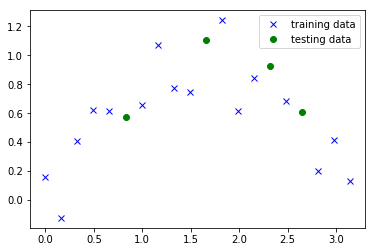

In [88]:
xs = np.linspace(0, np.pi)
plt.plot(x_train, y_train,'bx')
plt.plot(x_test, y_test,'go')
plt.legend(["training data", "testing data"])
plt.show()

# Default NN. Overfitting

In [89]:
model = nn_default(x_train, y_train)
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_75 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


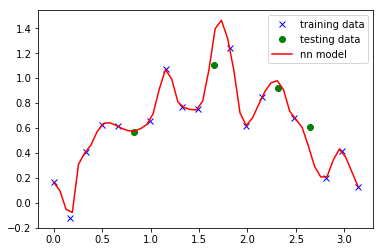

In [90]:
plot_data_prediction(x_train, y_train, x_test, y_test)

In [91]:
print_r2_score(model, x_train, y_train, x_test, y_test)

R2 score (train) 0.9999999999998266
R2 score (test) 0.5126551210530619


# Overfit reduction

## Regularization added to layer(s). L2 - Ridge Regression

In [92]:
regularization_lambda = 0.003
model = nn_regularization(x_train, y_train, regularization_lambda)
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_78 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_79 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 101       
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


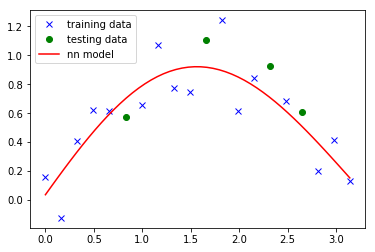

In [94]:
plot_data_prediction(x_train, y_train, x_test, y_test)

In [95]:
print_r2_score(model, x_train, y_train, x_test, y_test)

R2 score (train) 0.7417280344716878
R2 score (test) 0.45547649074615915


## Dropout layers

In [96]:
dropout_rate = 0.4
model = nn_dropout(x_train, y_train, dropout_rate)
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 100)               200       
_________________________________________________________________
dropout_28 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_82 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_29 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_30 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 1)               

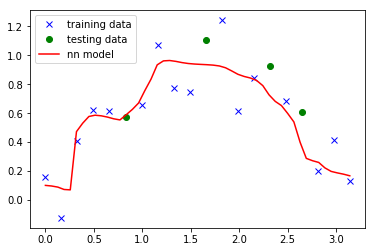

In [97]:
plot_data_prediction(x_train, y_train, x_test, y_test)

In [98]:
print_r2_score(model, x_train, y_train, x_test, y_test)

R2 score (train) 0.8029785819595829
R2 score (test) 0.314244887574491


# Conclusion

|       Neural Network   | R2 trn | R2 tst |
|------------------------|:------:|-------:|
| Default. Overfitting   |  0.999 |  0.179 |
| With L2 regularization |  0.742 |  0.456 |
| With dropout layers    |  0.765 |  0.520 |

Default NN overfits on our dataset. It can be seen from R2 score - high on training and low on testing datasets.
Overfiting reduction methods reduce R2 score on training dataset  at the same incresse model's generalization. 